# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Skip this part if you load stored numpy arrays (Mirai*.npy) (which is recommended)

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 2: Get a graphics card

Skip this part if you run on the CPU

Lets make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [1]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import  tensorflow.keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Part 3: Hardware

Skip questions 1, 2, 3, 5, 6 if you use your own computer.

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

_____________________________________________________________________________________________________

*Question 4*:

Answer):

Parameters: The weights and biases of the network

Optimizer’s variables (e.g. momentums)

Intermediate calculations — Values from the forward pass that are temporarily stored in GPU memory and then used in the backward pass. (e.g. the activation outputs of every layer are used in the backward pass to calculate the gradients)

# Part 4: Load the data

To make this step easier, directly load the data from saved numpy arrays (.npy) (recommended)


Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. 

We will use the function `genfromtxt` to load the data.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.


In [2]:
from numpy import genfromtxt
import numpy as np

# Load data from numpy arrays
X = np.load('Mirai_data_half.npy')
Y = np.load('Mirai_labels_half.npy')

In [3]:


# Remove the first 24 covariates (columns)

X = np.delete(X, obj=np.s_[:24], axis=1)
X = np.delete(X, obj=np.s_[:24], axis=1)

print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

    

The covariates have size (382069, 68).
The labels have size (382069,).


In [4]:
# Print the number of examples of each class
t =np.unique(Y,return_counts=True)
print("class 0 has",t[1][0],' ', 'examples')
print("class 1 has",t[1][1],' ', 'examples')


class 0 has 60811   examples
class 1 has 321258   examples


# Part 5: How good is a naive classifier?

Question 7: Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

Answer) if we assume all examples belong to class 0 the accuracy will be $\frac{60811}{382069}\approx 0.16$

if we assume all example belongs to class 1 the accuracy will be $\frac{321258}{382069}\approx 0.84$

In [5]:
60811/382069

0.15916235025610556

In [6]:
321258/382069

0.8408376497438944

In [7]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

#print(np.isnan(X))
#print(np.isnan(Y))# Print the number of NaNs (not a number) in the labels

# Print the number of NaNs in the covariates
print('number of NaN in X: ', np.count_nonzero(np.isnan(X)))
print('number of NaN in Y: ', np.count_nonzero(np.isnan(Y)))


number of NaN in X:  0
number of NaN in Y:  0


# Part 6: Preprocessing

Lets do some simple preprocessing

In [8]:
# Convert covariates to floats
X = X.astype(float)


# Convert labels to integers

Y = Y.astype(int)

# Remove mean of each covariate (column)
X = X - np.mean(X, axis=0)


# Divide each covariate (column) by its standard deviation

X = X/np.std(X, axis=0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("Mean for covariates is almost 0: ", np.sum(X)/len(X))
print('\n')
print("Standard Deviation for covariates is: ",np.std(X, axis=0))


Mean for covariates is almost 0:  -3.36886988413941e-12


Standard Deviation for covariates is:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)

We use a function from scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [9]:
from sklearn.model_selection import train_test_split

# Your code

Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y, test_size=0.3, random_state=42)
print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

print('Ytrain class_0 has {} members.'.format(np.count_nonzero(Ytrain==0)))
print('Ytrain class_1 has {} members.'.format(np.count_nonzero(Ytrain==1)))
print('Ytemp class_0 has {} members.'.format(np.count_nonzero(Ytemp==0)))
print('Ytemp class_1 has {} members.'.format(np.count_nonzero(Ytemp==1)))


Xtrain has size (267448, 68).
Ytrain has size (267448,).
Xtemp has size (114621, 68).
Ytemp has size (114621,).
Ytrain class_0 has 42583 members.
Ytrain class_1 has 224865 members.
Ytemp class_0 has 18228 members.
Ytemp class_1 has 96393 members.


#  Part 8: Split non-training data data into validation and test
Now split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Do all variables (Xtrain,Ytrain), (Xval,Yval), (Xtest,Ytest) have the shape that you expect?

In [10]:
from sklearn.model_selection import train_test_split



Xtest, Xval, Ytest, Yval = train_test_split(Xtemp, Ytemp, test_size=0.5, random_state=42)
print('Xtest has size {}.'.format(Xtest.shape))
print('Ytest has size {}.'.format(Ytest.shape))

print('Xval has size {}.'.format(Xval.shape))
print('Yval has size {}.'.format(Yval.shape))

print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

Xtest has size (57310, 68).
Ytest has size (57310,).
Xval has size (57311, 68).
Yval has size (57311,).
The validation and test data have size (57311, 68), (57310, 68), (57311,) and (57310,)


if we copmute half of the Xtemp we can see that the variable has the shape we expected.

In [11]:
(int(np.ceil(len(X)*0.3/2)))

57311

which is the same lenght as our Xtest split.

# Part 9: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

For different parts of this notebook you need to go back here, add more things, and re-run this cell to re-define the build function.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.losses import binary_crossentropy

In [13]:

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
     
    # Setup optimizer, depending on input parameter string
      
    # Setup optimizer, depending on input parameter string
    if optimizer=='sgd':
        optim = SGD(learning_rate=learning_rate)
    if optimizer=='adam':
        optim = Adam(learning_rate)
    if optimizer=='RMSprop':
        optim = RMSprop(learning_rate)
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    model.add(Dense(n_nodes,input_shape = input_shape,activation = act_fun ))
    # Add first layer, requires input shape
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes,activation = act_fun))
        if use_bn == True:
            model.add(BatchNormalization())
            #print(use_bn)
        if use_dropout==True:
            model.add(Dropout(rate=0.5))
            
           # print(use_dropout)
        if use_custom_dropout == True:
            model.add(myDropout(rate=0.5))
       # Final layer
    model.add(Dense(1,activation = act_fun))
    # Compile model
    model.compile(optim,loss=binary_crossentropy,metrics=['accuracy'])
    return model

In [14]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 10: Train the DNN

Time to train the DNN, we start simple with 2 layers with 20 nodes each, learning rate 0.1.

Relevant functions

`build_DNN`, the function we defined in Part 9, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


### 2 layers, 20 nodes

In [15]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape =(Xtrain.shape[1],) 
# Build the model
model1 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1)


# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size)

Epoch 1/20
27/27 [==============================] - 4s 16ms/step - loss: 0.4776 - accuracy: 0.8403 - val_loss: 0.4270 - val_accuracy: 0.8409
Epoch 2/20
27/27 [==============================] - 0s 9ms/step - loss: 0.4245 - accuracy: 0.8407 - val_loss: 0.4167 - val_accuracy: 0.8409
Epoch 3/20
27/27 [==============================] - 0s 7ms/step - loss: 0.4127 - accuracy: 0.8416 - val_loss: 0.4053 - val_accuracy: 0.8409
Epoch 4/20
27/27 [==============================] - 0s 8ms/step - loss: 0.4022 - accuracy: 0.8406 - val_loss: 0.3918 - val_accuracy: 0.8409
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 0.3872 - accuracy: 0.8411 - val_loss: 0.3757 - val_accuracy: 0.8409
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 0.3715 - accuracy: 0.8402 - val_loss: 0.3566 - val_accuracy: 0.8409
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 0.3520 - accuracy: 0.8398 - val_loss: 0.3349 - val_accuracy: 0.8409
Epoch 8/20
27/27 [=

In [16]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest, Ytest, batch_size=batch_size)


print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

6/6 [==============================] - 0s 6ms/step - loss: 0.2003 - accuracy: 0.9011
Test loss: 0.2003
Test accuracy: 0.9011


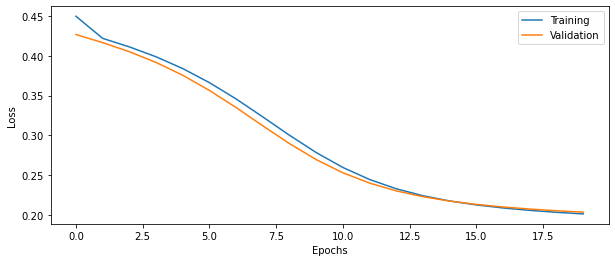

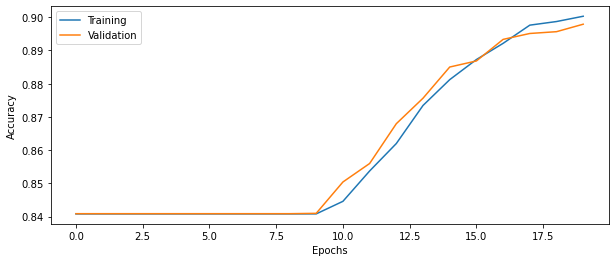

In [17]:
# Plot the history from the training run
plot_results(history1)

# Part 11: More questions

Question 8: What happens if you add several Dense layers without specifying the activation function

Answer)
without activation function the model will perform like a linear model.In such case we can expect the network to perform a regression model.

Question 9: How are the weights in each dense layer initialized as default? How are the bias weights initialized?

Answer)
Weight and bias initialization for each layer can be set via kernel_initializer and bias_initializer keyword arguments respectively within layers.Dense(). If undefined by user, default settings of kernel_initializer='glorot_uniform' and bias_initializer='zeros' are applied. [How to initialize biases in a Keras model?](https://stackoverflow.com/questions/40708169/how-to-initialize-biases-in-a-keras-model/44148506#:~:text=Weight%20and%20bias%20initialization%20for,bias_initializer%3D'zeros'%20are%20applied.)


# Part 12: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [18]:
from sklearn.utils import class_weight

# Calculate class weights

classWeight = class_weight.compute_class_weight('balanced', np.unique(Ytrain), Ytrain)

# Print the class weights
print(classWeight)
# Keras wants the weights in this form, uncomment and change value1 and value2 to your weights, 
# or get them from the array that is returned from class_weight

class_weights= {0: 3.14031421,
            1:  0.5946857}
print(class_weights)

[3.14031421 0.5946857 ]
{0: 3.14031421, 1: 0.5946857}


### 2 layers, 20 nodes, class weights

In [19]:
# Setup some training parameters
batch_size = 10000
epochs = 20
nput_shape =(Xtrain.shape[1],) 
# Build the model
model2 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1)


# Train the model, provide training data and validation data
history2 = model1.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight=class_weights)


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
27/27 [==============================] - 1s 14ms/step - loss: 0.2686 - accuracy: 0.8818 - val_loss: 0.2691 - val_accuracy: 0.8776
Epoch 2/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2361 - accuracy: 0.8804 - val_loss: 0.2807 - val_accuracy: 0.8775
Epoch 3/20
27/27 [==============================] - 0s 9ms/step - loss: 0.2316 - accuracy: 0.8803 - val_loss: 0.2805 - val_accuracy: 0.8775
Epoch 4/20
27/27 [==============================] - 0s 9ms/step - loss: 0.2283 - accuracy: 0.8803 - val_loss: 0.2791 - val_accuracy: 0.8775
Epoch 5/20
27/27 [==============================] - 0s 9ms/step - loss: 0.2258 - accuracy: 0.8803 - val_loss: 0.2778 - val_accuracy: 0.8774
Epoch 6/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2237 - accuracy: 0.8804 - val_loss: 0.2763 - val_accuracy: 0.8774
Epoch 7/20
27/27 [=

In [20]:
# Evaluate model on test data
score = model2.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

1791/1791 [==============================] - 6s 3ms/step - loss: 0.4707 - accuracy: 0.8429
Test loss: 0.4727
Test accuracy: 0.8411


In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                1380      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,821
Trainable params: 1,821
Non-trainable params: 0
_________________________________________________________________


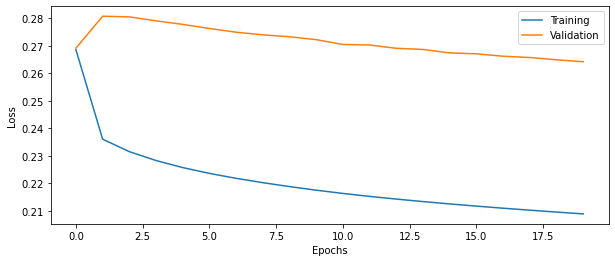

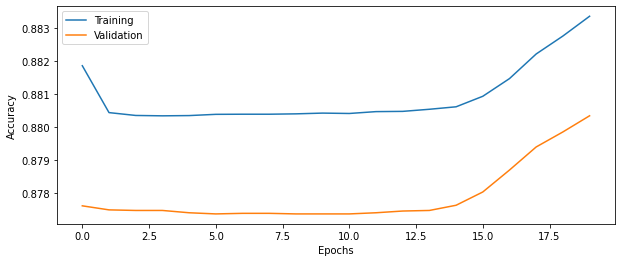

In [22]:
plot_results(history2)

# Part 13: More questions

Skip questions 11 and 12 if you run on the CPU

Question 10: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

*Answer: training a Neural Network require large amount of data. Fitting all these data in memory is not always possible. That is why we use batch.Furthermore, Bat*
Question 11: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

Question 12: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

Question 13: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

Question 14: What limits how large the batch size can be?

Question 15: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

# Part 14: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 16: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

### 4 layers, 20 nodes, class weights

In [23]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (Xtrain.shape[1],) 

# Build and train model
model3 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=20, learning_rate=0.1)

history3 =  model3.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight=class_weights)


Epoch 1/20
27/27 [==============================] - 1s 16ms/step - loss: 0.6935 - accuracy: 0.1621 - val_loss: 0.6920 - val_accuracy: 0.8303
Epoch 2/20
27/27 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.6608 - val_loss: 0.6916 - val_accuracy: 0.8359
Epoch 3/20
27/27 [==============================] - 0s 9ms/step - loss: 0.6917 - accuracy: 0.7590 - val_loss: 0.6952 - val_accuracy: 0.1633
Epoch 4/20
27/27 [==============================] - 0s 10ms/step - loss: 0.6917 - accuracy: 0.4092 - val_loss: 0.6939 - val_accuracy: 0.1667
Epoch 5/20
27/27 [==============================] - 0s 10ms/step - loss: 0.6924 - accuracy: 0.4131 - val_loss: 0.6947 - val_accuracy: 0.1628
Epoch 6/20
27/27 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.3719 - val_loss: 0.6933 - val_accuracy: 0.3284
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 0.6941 - accuracy: 0.3823 - val_loss: 0.6914 - val_accuracy: 0.8496
Epoch 8/20
27/27

In [24]:
# Evaluate model on test data
score =  model3.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])



1791/1791 [==============================] - 6s 3ms/step - loss: 0.6856 - accuracy: 0.8733
Test loss: 0.6856
Test accuracy: 0.8733


In [25]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                1380      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 2,661
Trainable params: 2,661
Non-trainable params: 0
_________________________________________________________________


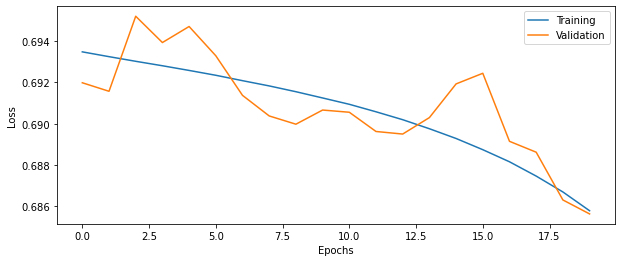

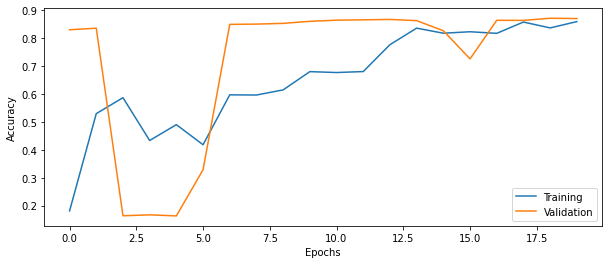

In [26]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [27]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (Xtrain.shape[1],) 


# Build and train model
model4 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=50, learning_rate=0.1)

history4 = model4.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight=class_weights)


Epoch 1/20
27/27 [==============================] - 1s 15ms/step - loss: 0.6720 - accuracy: 0.8606 - val_loss: 0.6102 - val_accuracy: 0.8721
Epoch 2/20
27/27 [==============================] - 0s 10ms/step - loss: 0.5951 - accuracy: 0.8747 - val_loss: 0.5339 - val_accuracy: 0.8715
Epoch 3/20
27/27 [==============================] - 0s 10ms/step - loss: 0.5083 - accuracy: 0.8766 - val_loss: 0.4446 - val_accuracy: 0.8731
Epoch 4/20
27/27 [==============================] - 0s 9ms/step - loss: 0.4150 - accuracy: 0.8783 - val_loss: 0.3709 - val_accuracy: 0.8756
Epoch 5/20
27/27 [==============================] - 0s 10ms/step - loss: 0.3409 - accuracy: 0.8820 - val_loss: 0.3347 - val_accuracy: 0.8785
Epoch 6/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2938 - accuracy: 0.8816 - val_loss: 0.3138 - val_accuracy: 0.8785
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 0.2686 - accuracy: 0.8820 - val_loss: 0.3013 - val_accuracy: 0.8785
Epoch 8/20
27/2

In [28]:
# Evaluate model on test data
score =  model4.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])



1791/1791 [==============================] - 6s 3ms/step - loss: 0.2666 - accuracy: 0.8804
Test loss: 0.2666
Test accuracy: 0.8804


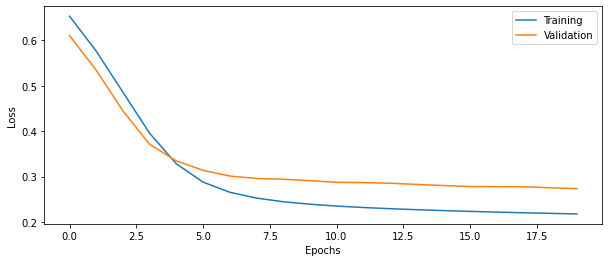

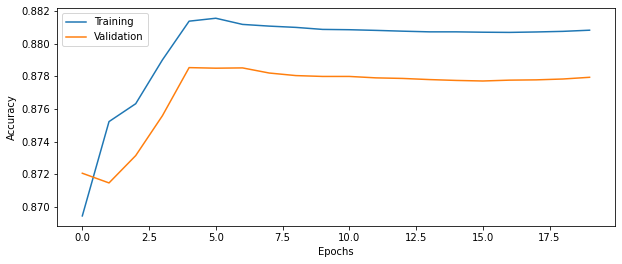

In [29]:
plot_results(history4)

In [30]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                3450      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 6,051
Trainable params: 6,051
Non-trainable params: 0
_________________________________________________________________


### 4 layers, 50 nodes, class weights

In [31]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (Xtrain.shape[1],) 

# Build and train model
model5 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=50, learning_rate=0.1)



history5  = model5.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight=class_weights)


Epoch 1/20
27/27 [==============================] - 1s 17ms/step - loss: 0.7026 - accuracy: 0.3030 - val_loss: 0.6907 - val_accuracy: 0.8486
Epoch 2/20
27/27 [==============================] - 0s 11ms/step - loss: 0.6928 - accuracy: 0.6543 - val_loss: 0.6957 - val_accuracy: 0.1593
Epoch 3/20
27/27 [==============================] - 0s 11ms/step - loss: 0.6909 - accuracy: 0.5676 - val_loss: 0.6876 - val_accuracy: 0.8411
Epoch 4/20
27/27 [==============================] - 0s 11ms/step - loss: 0.6905 - accuracy: 0.7119 - val_loss: 0.6939 - val_accuracy: 0.1636
Epoch 5/20
27/27 [==============================] - 0s 11ms/step - loss: 0.6894 - accuracy: 0.5967 - val_loss: 0.6925 - val_accuracy: 0.7774
Epoch 6/20
27/27 [==============================] - 0s 11ms/step - loss: 0.6901 - accuracy: 0.6638 - val_loss: 0.6854 - val_accuracy: 0.8542
Epoch 7/20
27/27 [==============================] - 0s 11ms/step - loss: 0.6901 - accuracy: 0.7542 - val_loss: 0.6881 - val_accuracy: 0.8737
Epoch 8/20
27

In [32]:
# Evaluate model on test data
score = model5.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])





1791/1791 [==============================] - 6s 3ms/step - loss: 0.6621 - accuracy: 0.8739
Test loss: 0.6621
Test accuracy: 0.8739


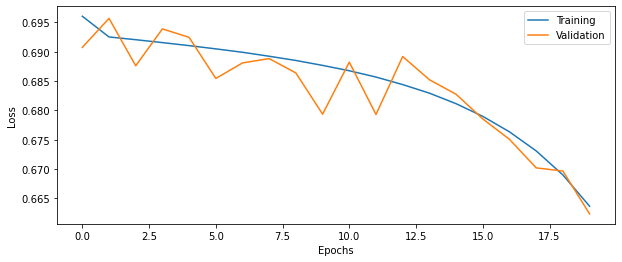

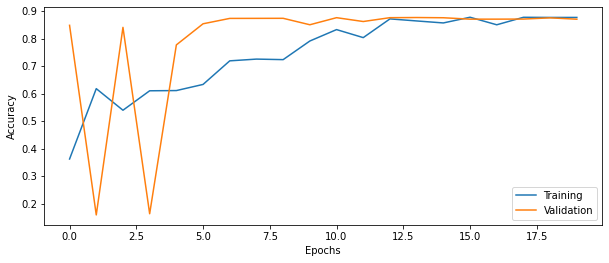

In [33]:
plot_results(history5)

In [34]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 50)                3450      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 11,151
Trainable params: 11,151
Non-trainable params: 0
_________________________________________________________________


# Part 15: Batch normalization

Now add batch normalization after each dense layer in `build_DNN`. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 17: Why is batch normalization important when training deep networks?

### 2 layers, 20 nodes, class weights, batch normalization

In [35]:
# Setup some training parameters
from tensorflow.keras.layers import BatchNormalization
batch_size = 10000
epochs = 20
input_shape = (Xtrain.shape[1],) 

# Build and train model
model6 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1,use_bn=True)
history6  = model6.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval)
                       ,batch_size=batch_size,class_weight=class_weights)


Epoch 1/20
27/27 [==============================] - 1s 19ms/step - loss: 0.3426 - accuracy: 0.8717 - val_loss: 0.4198 - val_accuracy: 0.8409
Epoch 2/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2579 - accuracy: 0.8801 - val_loss: 0.4005 - val_accuracy: 0.8409
Epoch 3/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2316 - accuracy: 0.8839 - val_loss: 0.4008 - val_accuracy: 0.8409
Epoch 4/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2190 - accuracy: 0.8881 - val_loss: 0.4052 - val_accuracy: 0.8409
Epoch 5/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2115 - accuracy: 0.8919 - val_loss: 0.4071 - val_accuracy: 0.8409
Epoch 6/20
27/27 [==============================] - 0s 10ms/step - loss: 0.2077 - accuracy: 0.8949 - val_loss: 0.4085 - val_accuracy: 0.8409
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 0.2038 - accuracy: 0.8977 - val_loss: 0.4073 - val_accuracy: 0.8409
Epoch 8/20
27/

In [36]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                1380      
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 21        
Total params: 1,901
Trainable params: 1,861
Non-trainable params: 40
_________________________________________________________________


In [37]:
# Evaluate model on test data
score =  model6.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])


1791/1791 [==============================] - 6s 3ms/step - loss: 0.1917 - accuracy: 0.8672
Test loss: 0.1917
Test accuracy: 0.8672


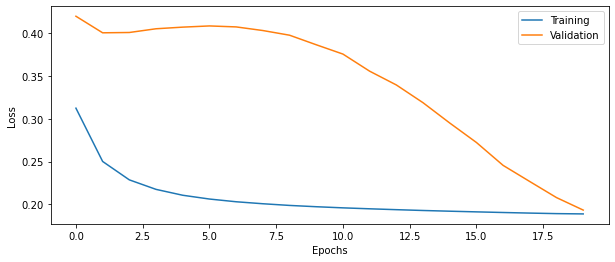

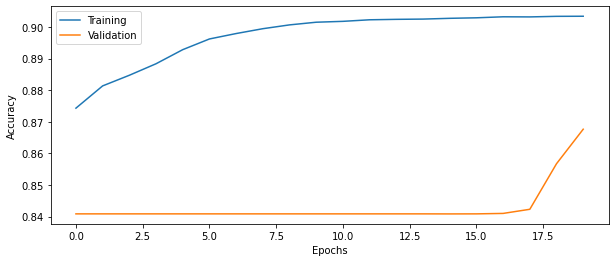

In [38]:
plot_results(history6)

# Part 16: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

https://keras.io/api/layers/activations/

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [39]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =(Xtrain.shape[1],)


# Build and train model
model7 = build_DNN(act_fun='relu',input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1)

history7 = model7.fit(Xtrain,Ytrain,epochs=epochs,validation_data=(Xval,Yval),batch_size=batch_size,class_weight=class_weights)

Epoch 1/20
27/27 [==============================] - 1s 15ms/step - loss: 2.1511 - accuracy: 0.7665 - val_loss: 1.7994 - val_accuracy: 0.8767
Epoch 2/20
27/27 [==============================] - 0s 9ms/step - loss: 1.0600 - accuracy: 0.8789 - val_loss: 1.8069 - val_accuracy: 0.8764
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 1.0454 - accuracy: 0.8797 - val_loss: 1.7949 - val_accuracy: 0.8771
Epoch 4/20
27/27 [==============================] - 0s 8ms/step - loss: 1.0468 - accuracy: 0.8797 - val_loss: 1.8102 - val_accuracy: 0.8768
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 1.0740 - accuracy: 0.8805 - val_loss: 1.7950 - val_accuracy: 0.8771
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 1.0693 - accuracy: 0.8792 - val_loss: 1.7900 - val_accuracy: 0.8774
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 1.0386 - accuracy: 0.8808 - val_loss: 1.5798 - val_accuracy: 0.8870
Epoch 8/20
27/27 [=

In [40]:
# Evaluate model on test data
score =model7.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

1791/1791 [==============================] - 6s 3ms/step - loss: 12.9738 - accuracy: 0.1589
Test loss: 12.9738
Test accuracy: 0.1589


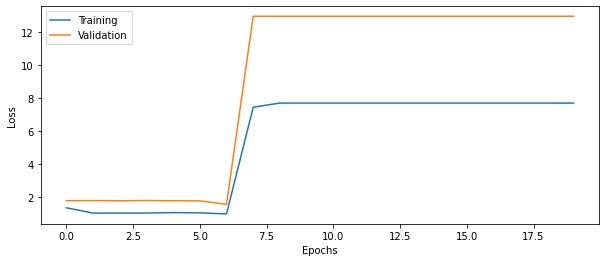

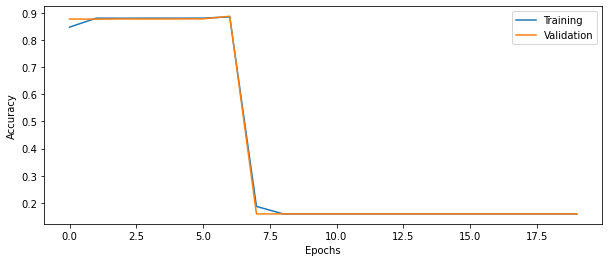

In [41]:
plot_results(history7)

# Part 17: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [42]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =(Xtrain.shape[1],)


# Build and train model
model8  = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1,optimizer='adam')


history8 =  model8.fit(Xtrain,Ytrain,epochs=epochs,validation_data=(Xval,Yval),batch_size=batch_size,class_weight=class_weights)

Epoch 1/20
27/27 [==============================] - 1s 21ms/step - loss: 0.3970 - accuracy: 0.8006 - val_loss: 0.2618 - val_accuracy: 0.8920
Epoch 2/20
27/27 [==============================] - 0s 9ms/step - loss: 0.1920 - accuracy: 0.8987 - val_loss: 0.2414 - val_accuracy: 0.9000
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 0.1859 - accuracy: 0.9030 - val_loss: 0.2441 - val_accuracy: 0.9004
Epoch 4/20
27/27 [==============================] - 0s 8ms/step - loss: 0.1831 - accuracy: 0.9037 - val_loss: 0.2344 - val_accuracy: 0.9008
Epoch 5/20
27/27 [==============================] - 0s 9ms/step - loss: 0.1770 - accuracy: 0.9058 - val_loss: 0.2259 - val_accuracy: 0.9108
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 0.1677 - accuracy: 0.9145 - val_loss: 0.2244 - val_accuracy: 0.9131
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 0.1628 - accuracy: 0.9170 - val_loss: 0.2098 - val_accuracy: 0.9139
Epoch 8/20
27/27 [=

In [43]:
# Evaluate model on test data
score = model8.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

1791/1791 [==============================] - 5s 3ms/step - loss: 0.2136 - accuracy: 0.9183
Test loss: 0.2136
Test accuracy: 0.9183


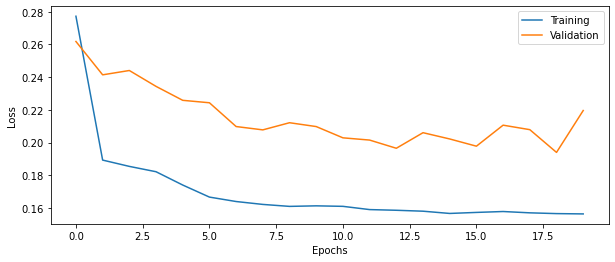

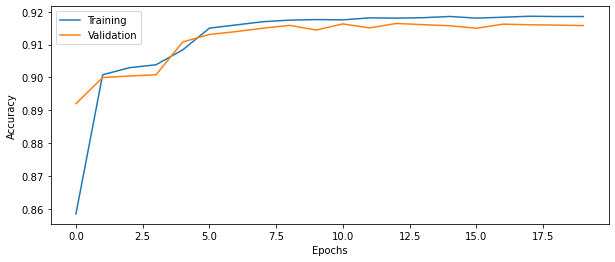

In [44]:
plot_results(history8)

# Part 18: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/api/layers/regularization_layers/dropout/ for how the Dropout layer works.

---

Question 18: How does the validation accuracy change when adding dropout?

Question 19: How does the test accuracy change when adding dropout?

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [45]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =(Xtrain.shape[1],)

# Build and train model
model9 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1,use_dropout=True)

history9 =  model9.fit(Xtrain,Ytrain,epochs=epochs,validation_data=(Xval,Yval),batch_size=batch_size,class_weight=class_weights)

Epoch 1/20
27/27 [==============================] - 1s 16ms/step - loss: 0.7267 - accuracy: 0.5328 - val_loss: 0.6661 - val_accuracy: 0.8713
Epoch 2/20
27/27 [==============================] - 0s 9ms/step - loss: 0.6895 - accuracy: 0.5539 - val_loss: 0.6415 - val_accuracy: 0.8718
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 0.6582 - accuracy: 0.6034 - val_loss: 0.6065 - val_accuracy: 0.8714
Epoch 4/20
27/27 [==============================] - 0s 9ms/step - loss: 0.6276 - accuracy: 0.6517 - val_loss: 0.5660 - val_accuracy: 0.8713
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 0.5850 - accuracy: 0.7026 - val_loss: 0.5158 - val_accuracy: 0.8719
Epoch 6/20
27/27 [==============================] - 0s 9ms/step - loss: 0.5409 - accuracy: 0.7443 - val_loss: 0.4637 - val_accuracy: 0.8769
Epoch 7/20
27/27 [==============================] - 0s 10ms/step - loss: 0.4953 - accuracy: 0.7767 - val_loss: 0.4182 - val_accuracy: 0.8769
Epoch 8/20
27/27 [

In [46]:
# Evaluate model on test data
score = model9.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

1791/1791 [==============================] - 5s 3ms/step - loss: 0.2766 - accuracy: 0.8797
Test loss: 0.2766
Test accuracy: 0.8797


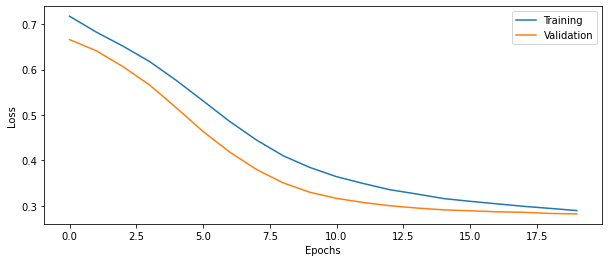

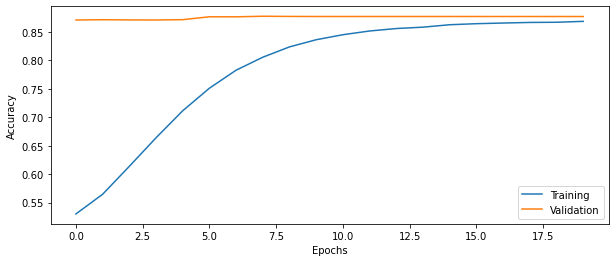

In [47]:
plot_results(history9)

# Part 19: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 20: How high classification accuracy can you achieve for the test data? What is your best configuration?

In [48]:
# Find your best configuration for the DNN

# Build and train DNN
batch_size = 25000
epochs = 25
input_shape = (Xtrain.shape[1],)

# Build and train DNN
model10 = build_DNN(act_fun='softplus',input_shape=input_shape, n_layers=4, n_nodes=30, optimizer='RMSprop', 
                    use_bn=True,learning_rate=0.005,use_dropout=True)

history10 = model10.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, 
                      class_weight=class_weights, validation_data=(Xval, Yval))

Epoch 1/25
11/11 [==============================] - 2s 54ms/step - loss: 1.2358 - accuracy: 0.7911 - val_loss: 1.0985 - val_accuracy: 0.8483
Epoch 2/25
11/11 [==============================] - 0s 27ms/step - loss: 0.3690 - accuracy: 0.8732 - val_loss: 0.4588 - val_accuracy: 0.8649
Epoch 3/25
11/11 [==============================] - 0s 26ms/step - loss: 0.3082 - accuracy: 0.8797 - val_loss: 0.4611 - val_accuracy: 0.8549
Epoch 4/25
11/11 [==============================] - 0s 26ms/step - loss: 0.2836 - accuracy: 0.8841 - val_loss: 0.4760 - val_accuracy: 0.8540
Epoch 5/25
11/11 [==============================] - 0s 26ms/step - loss: 0.2662 - accuracy: 0.8909 - val_loss: 0.3631 - val_accuracy: 0.8703
Epoch 6/25
11/11 [==============================] - 0s 27ms/step - loss: 0.2434 - accuracy: 0.8967 - val_loss: 0.3664 - val_accuracy: 0.8716
Epoch 7/25
11/11 [==============================] - 0s 26ms/step - loss: 0.2359 - accuracy: 0.9004 - val_loss: 0.3991 - val_accuracy: 0.8613
Epoch 8/25
11

In [49]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

1791/1791 [==============================] - 8s 4ms/step - loss: 0.2004 - accuracy: 0.9152
Test loss: 0.2004
Test accuracy: 0.9152


# Part 20: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN. The `build_DNN` function takes two boolean arguments, use_dropout and use_custom_dropout, add a standard Dropout layer if use_dropout is true, add a myDropout layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 21: What is the mean and the standard deviation of the test accuracy?

`mean of the test Accuracies is: 0.9158476728200913.
sd of the test Accuracies is: 0.00010767426324562475.
`

In [50]:
import tensorflow.keras.backend as K
import tensorflow.keras

class myDropout(tensorflow.keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [51]:
# Your best training parameters

# Build and train model
batch_size = 20000
epochs = 100
input_shape = (Xtrain.shape[1],)

# Build and train model
model11 = build_DNN(act_fun='softplus',input_shape=input_shape, n_layers=6, n_nodes=30, optimizer='RMSprop', 
                   learning_rate=0.005, use_custom_dropout=True)

history11 = model11.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs,
                      class_weight=class_weights, validation_data=(Xval, Yval))

Epoch 1/250
11/11 [==============================] - 2s 44ms/step - loss: 2.0517 - accuracy: 0.4029 - val_loss: 0.8239 - val_accuracy: 0.5827
Epoch 2/250
11/11 [==============================] - 0s 20ms/step - loss: 0.6795 - accuracy: 0.6547 - val_loss: 0.5831 - val_accuracy: 0.7375
Epoch 3/250
11/11 [==============================] - 0s 18ms/step - loss: 0.4102 - accuracy: 0.7868 - val_loss: 0.3821 - val_accuracy: 0.8356
Epoch 4/250
11/11 [==============================] - 0s 19ms/step - loss: 0.3147 - accuracy: 0.8471 - val_loss: 0.3256 - val_accuracy: 0.8598
Epoch 5/250
11/11 [==============================] - 0s 19ms/step - loss: 0.2774 - accuracy: 0.8653 - val_loss: 0.3118 - val_accuracy: 0.8684
Epoch 6/250
11/11 [==============================] - 0s 19ms/step - loss: 0.2526 - accuracy: 0.8726 - val_loss: 0.2918 - val_accuracy: 0.8745
Epoch 7/250
11/11 [==============================] - 0s 19ms/step - loss: 0.2389 - accuracy: 0.8788 - val_loss: 0.2674 - val_accuracy: 0.8858
Epoch 

11/11 [==============================] - 0s 19ms/step - loss: 0.1671 - accuracy: 0.9157 - val_loss: 0.2134 - val_accuracy: 0.9130
Epoch 116/250
11/11 [==============================] - 0s 19ms/step - loss: 0.1645 - accuracy: 0.9163 - val_loss: 0.2187 - val_accuracy: 0.9132
Epoch 117/250
11/11 [==============================] - 0s 19ms/step - loss: 0.1705 - accuracy: 0.9158 - val_loss: 0.2104 - val_accuracy: 0.9133
Epoch 118/250
11/11 [==============================] - 0s 19ms/step - loss: 0.1671 - accuracy: 0.9167 - val_loss: 0.2175 - val_accuracy: 0.9131
Epoch 119/250
11/11 [==============================] - 0s 19ms/step - loss: 0.1657 - accuracy: 0.9159 - val_loss: 0.2141 - val_accuracy: 0.9132
Epoch 120/250
11/11 [==============================] - 0s 18ms/step - loss: 0.1697 - accuracy: 0.9148 - val_loss: 0.2162 - val_accuracy: 0.9134
Epoch 121/250
11/11 [==============================] - 0s 18ms/step - loss: 0.1709 - accuracy: 0.9154 - val_loss: 0.2141 - val_accuracy: 0.9135
Epoch 

Epoch 172/250
11/11 [==============================] - 0s 20ms/step - loss: 0.1642 - accuracy: 0.9157 - val_loss: 0.2154 - val_accuracy: 0.9125
Epoch 173/250
11/11 [==============================] - 0s 19ms/step - loss: 0.1665 - accuracy: 0.9145 - val_loss: 0.2095 - val_accuracy: 0.9123
Epoch 174/250
11/11 [==============================] - 0s 21ms/step - loss: 0.1671 - accuracy: 0.9147 - val_loss: 0.2187 - val_accuracy: 0.9126
Epoch 175/250
11/11 [==============================] - 0s 25ms/step - loss: 0.1645 - accuracy: 0.9154 - val_loss: 0.2164 - val_accuracy: 0.9131
Epoch 176/250
11/11 [==============================] - 0s 34ms/step - loss: 0.1646 - accuracy: 0.9158 - val_loss: 0.2159 - val_accuracy: 0.9132
Epoch 177/250
11/11 [==============================] - 0s 26ms/step - loss: 0.1656 - accuracy: 0.9151 - val_loss: 0.2085 - val_accuracy: 0.9139
Epoch 178/250
11/11 [==============================] - 0s 20ms/step - loss: 0.1658 - accuracy: 0.9168 - val_loss: 0.2116 - val_accuracy:

Epoch 229/250
11/11 [==============================] - 0s 21ms/step - loss: 0.1661 - accuracy: 0.9159 - val_loss: 0.2181 - val_accuracy: 0.9125
Epoch 230/250
11/11 [==============================] - 0s 20ms/step - loss: 0.1663 - accuracy: 0.9151 - val_loss: 0.2110 - val_accuracy: 0.9138
Epoch 231/250
11/11 [==============================] - 0s 21ms/step - loss: 0.1638 - accuracy: 0.9169 - val_loss: 0.2111 - val_accuracy: 0.9147
Epoch 232/250
11/11 [==============================] - 0s 20ms/step - loss: 0.1647 - accuracy: 0.9169 - val_loss: 0.2098 - val_accuracy: 0.9144
Epoch 233/250
11/11 [==============================] - 0s 20ms/step - loss: 0.1658 - accuracy: 0.9170 - val_loss: 0.2080 - val_accuracy: 0.9139
Epoch 234/250
11/11 [==============================] - 0s 21ms/step - loss: 0.1665 - accuracy: 0.9160 - val_loss: 0.2080 - val_accuracy: 0.9147
Epoch 235/250
11/11 [==============================] - 0s 19ms/step - loss: 0.1681 - accuracy: 0.9174 - val_loss: 0.2124 - val_accuracy:

In [52]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest)
                       
print('Test accuracy: %.4f' % score[1])

1791/1791 [==============================] - 7s 4ms/step - loss: 0.2078 - accuracy: 0.9162
Test accuracy: 0.9162


In [53]:
# Run the testing 100 times, and save the accuracies in an array

ACC=list()
for i in range(100):
      
    score = model11.evaluate(Xtest, Ytest, batch_size=batch_size)
    ACC.append(score[1])
# Calculate and print mean and std of accuracies


3/3 [==============================] - 0s 7ms/step - loss: 0.2079 - accuracy: 0.9161


In [54]:
print('mean of the test Accuracies is: {}.'.format(sum(ACC)/len(ACC)))
print('sd of the test Accuracies is: {}.'.format(np.array(ACC).std()))



mean of the test Accuracies is: 0.9161223214864731.
sd of the test Accuracies is: 9.94247391097152e-05.


# Part 21: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 22: What is the mean and the standard deviation of the test accuracy?

`mean of the test Accuracies is: 0.9142484724521637.
sd of the test Accuracies is: 0.001775243551527256.`

Question 23: What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.

Cross validiation is much more time-consuming than dropout. If training a network takes 24 hours and we use 10-fold then by Cross validiation it will take 10 days to evaluate the model.

In [55]:
from sklearn.model_selection import StratifiedKFold

# Build and train model
batch_size = 25000
epochs = 20
input_shape = (Xtrain.shape[1],)
cross_Acc = list()

# Define 10-fold cross validation
cvFolds = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)

# Loop over cross validation folds
for train_index, test_index in cvFolds.split(X, Y):
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    # Calculate class weights for current split
    model12 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=30, optimizer='RMSprop',
                        learning_rate=0.005, use_custom_dropout=True)
    
    # Fit the model with training set and class weights for this fold
    history12 = model12.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs,class_weight=class_weights, verbose=0)
    
    # Evaluate the model using the test set for this fold
    score = model12.evaluate(Xtest, Ytest, batch_size=batch_size)

    # Save the test accuracy in an array
    cross_Acc.append(score[1])
# Calculate and print mean and std of accuracies



2/2 [==============================] - 0s 8ms/step - loss: 0.2229 - accuracy: 0.9149


In [56]:
print('mean of the test Accuracies is: {}.'.format(sum(cross_Acc)/len(cross_Acc)))
print('sd of the test Accuracies is: {}.'.format(np.array(cross_Acc).std()))


mean of the test Accuracies is: 0.9140312433242798.
sd of the test Accuracies is: 0.00166357768303682.


# Part 22: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 24: How would you change the DNN in order to use it for regression instead?

we can use the `KerasRegressor` from ` keras.wrappers.scikit_learn`. we create an instance from it and pass to model.`fit()`.
The loss function that is used in regression could be `MeanSquaredError `. The complete list is available at https://keras.io/api/losses/regression_losses/. Other steps will be the same.

## Report

Send in this jupyter notebook, with answers to all questions.